## Importing Libraries

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,accuracy_score
import pandas as pd
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Creating the paths to the images

In [62]:
import os
import numpy as np
from keras.preprocessing import image
import cv2
#import dlib

# PATH TO ALL IMAGES
global base_dir, image_paths, target_size
base_dir = './dataset'
images_dir = os.path.join(base_dir,'image')
label_filename = 'label.csv'

# Finding paths for all the images
image_paths = [os.path.join(images_dir, l) for l in os.listdir(images_dir)]
target_size = None
# Opening the label file
label_file = open(os.path.join(base_dir, label_filename), 'r')
# Reading the lines
label_lines = label_file.readlines()
#print(image_paths)
tumor_labels = {line.split(',')[0] : line.split(',')[1] for line in label_lines[1:]}
for k, v in tumor_labels.items():
    tumor_labels[k] = v.replace('\n', '')
#tumor_labels[:,1] = {line.replace('\n', '') for line in tumor_labels[1:]}
for k in tumor_labels:
    if 'no_tumor' in tumor_labels[k]:
        tumor_labels[k] = 0
    else:
        tumor_labels[k] = 1
    #tumor_labels[k].contains() == 
#print(tumor_labels)

if os.path.isdir(images_dir):
    all_features = []
    #         all_features = []
    all_labels = []
    for img_path in image_paths:
         #No need for this 
            # file_name= img_path.split('/')[-1]
        file_name= img_path.split('.')[1].split('/')[-1] + '.jpg'
       
        # load image
        img = image.img_to_array(image.load_img(img_path, color_mode='grayscale', target_size=target_size, interpolation='bicubic'))
        #features, _ = run_dlib_shape(img)
        if img is not None:
            all_features.append(img)
            all_labels.append(tumor_labels[file_name])
#print(np.array(all_features).shape)
print(np.array(all_features))


# def extract_features_labels():
#     """
#     This funtion extracts the landmarks features for all images in the folder 'dataset/celeba'.
#     It also extracts the gender label for each image.
#     :return:
#         landmark_features:  an array containing 68 landmark points for each image in which a face was detected
#         gender_labels:      an array containing the gender label (male=0 and female=1) for each image in
#                             which a face was detected
#     """
#     image_paths = [os.path.join(images_dir, l) for l in os.listdir(images_dir)]
#     target_size = None
#     labels_file = open(os.path.join(basedir, labels_filename), 'r')
#     lines = labels_file.readlines()
#     gender_labels = {line.split(',')[0] : int(line.split(',')[6]) for line in lines[2:]}
#     if os.path.isdir(images_dir):
#         all_features = []
#         all_labels = []
#         for img_path in image_paths:
#             file_name= img_path.split('.')[1].split('/')[-1]

#             # load image
#             img = image.img_to_array(
#                 image.load_img(img_path,
#                                target_size=target_size,
#                                interpolation='bicubic'))
#             features, _ = run_dlib_shape(img)
#             if features is not None:
#                 all_features.append(features)
#                 all_labels.append(gender_labels[file_name])

#     landmark_features = np.array(all_features)
#     gender_labels = (np.array(all_labels) + 1)/2 # simply converts the -1 into 0, so male=0 and female=1
#     return landmark_features, gender_labels

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

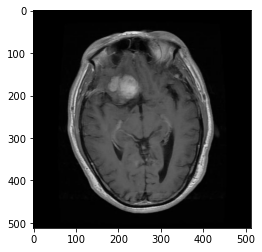

In [69]:
x = np.array(all_features)
y = np.array(all_labels)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=40) 

#img = mpimg.imread('your_image.png')
imgplot = plt.imshow(all_features[1], cmap='Greys_r')



In [67]:
classifier = svm.SVC(kernel = 'linear')
classifier.fit(xtrain, ytrain)
pred = classifier.predict(xtest)
print(pred)

ValueError: Found array with dim 4. Estimator expected <= 2.